In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\Home\\Desktop\\Saptha\\Machine-Learning\\American_Express_Techgig")

In [3]:
# Invoke garbage collector in python
import gc 

In [4]:
# Importing input Datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              590 non-null object
Age               590 non-null object
Debt              590 non-null float64
Married           590 non-null object
BankCustomer      590 non-null object
EducationLevel    590 non-null object
Ethnicity         590 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           590 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [6]:
# Finding Columns with missing values.

print (train.Male.value_counts())
print (train.Age.value_counts())
print (train.Debt.value_counts()) # No NULL values
print (train.Married.value_counts())
print (train.BankCustomer.value_counts())
print (train.EducationLevel.value_counts())
print (train.Ethnicity.value_counts())
print (train.YearsEmployed.value_counts()) # No NULL values
print (train.PriorDefault.value_counts()) # No NULL values
print (train.Employed.value_counts()) # No NULL values
print (train.CreditScore.value_counts()) # No NULL values
print (train.DriversLicense.value_counts()) # No NULL values
print (train.Citizen.value_counts()) # No NULL values
print (train.ZipCode.value_counts())
print (train.Income.value_counts()) # No NULL values
print (train.Approved.value_counts()) # No NULL values

b    400
a    179
?     11
Name: Male, dtype: int64
?        12
22.67     8
18.83     6
20.42     6
22.5      6
23.58     6
20.67     6
24.5      5
27.67     5
19.17     5
23.08     5
25        5
20        4
23.5      4
28.58     4
33.17     4
25.17     4
26.17     4
32.33     4
24.75     4
24.58     4
23        4
21.92     3
28.75     3
34.08     3
37.5      3
18.08     3
19.58     3
18.17     3
36.17     3
         ..
38.75     1
17.25     1
41.75     1
38.67     1
39.25     1
31.92     1
15.83     1
25.92     1
33.92     1
48.08     1
36.25     1
39        1
29.17     1
29.67     1
30.5      1
19.75     1
51.33     1
33        1
36.08     1
27.75     1
18.5      1
31.75     1
38.25     1
17.42     1
52.5      1
51.83     1
31        1
37.58     1
65.17     1
35.42     1
Name: Age, Length: 322, dtype: int64
1.500     20
2.500     17
0.000     17
3.000     17
1.250     15
5.000     14
0.750     14
1.750     12
4.000     11
0.500     10
10.000    10
11.000     9
2.000      9
6.500     

In [7]:
train.replace({'Age':{'?' :0}}, inplace=True)
train.Age = np.float32(train.Age)

In [8]:
train.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,30.622503,4.609390,2.088534,2.045763,918.706780
std,170.462606,12.684757,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,22.170000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,27.710000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,37.290001,7.000000,2.500000,2.000000,363.000000
max,590.000000,80.250000,26.335000,20.000000,20.000000,100000.000000


In [9]:
# Imputing by mean vs median
print (np.mean(train.Age))
print (np.median(train.Age))

30.62250328063965
27.71


AxesSubplot(0.125,0.125;0.775x0.755)


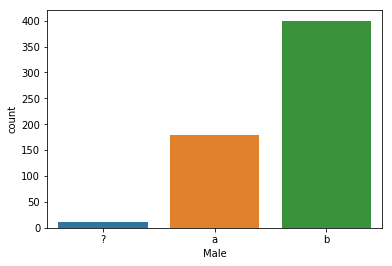

In [10]:
# Distribution of categorical variables before imputation
# we need to ensure that the distribution of the feature before and after imputation remained the same.

import seaborn as sns
print (sns.countplot(x="Male", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


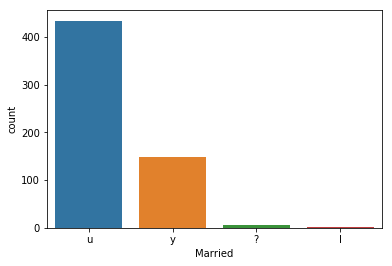

In [11]:
print (sns.countplot(x="Married", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


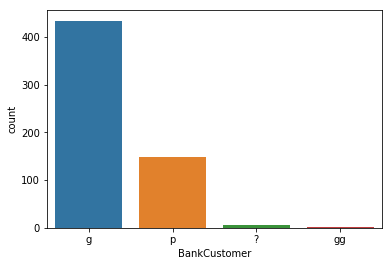

In [12]:
print (sns.countplot(x="BankCustomer", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


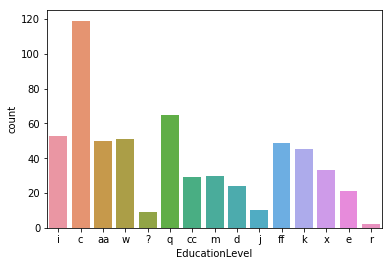

In [13]:
print (sns.countplot(x="EducationLevel", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


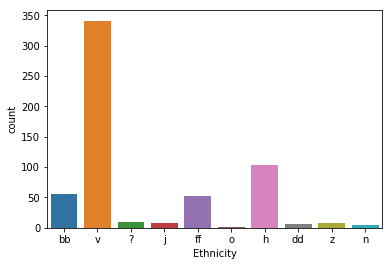

In [14]:
print (sns.countplot(x="Ethnicity", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


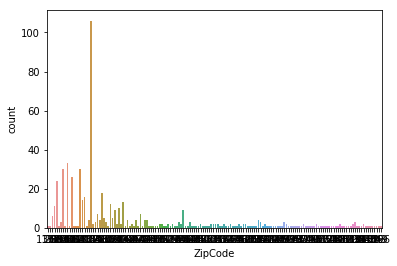

In [15]:
print (sns.countplot(x="ZipCode", data=train))

In [16]:
# Handling missing values & categorical data encoding.

# Replacing by mean
train.replace({'Age':{0 :round(np.mean(train.Age))}}, inplace=True) 

# Replacing by mode
train.replace({'Male':{'?' :'b'}}, inplace=True) 
train.replace({'Married':{'?' :'u'}}, inplace=True) 
train.replace({'BankCustomer':{'?' :'g'}}, inplace=True) 
train.replace({'EducationLevel':{'?' :'c'}}, inplace=True) 
train.replace({'Ethnicity':{'?' :'v'}}, inplace=True) 
train.replace({'ZipCode':{'?' :'0'}}, inplace=True) 

# Encoding true, false as 1,0 respectively --> Nominal categorical variables with just two categories.
train.replace({'PriorDefault':{'t' :1,'f' :0}}, inplace=True) 
train.replace({'Employed':{'t' :1, 'f' :0}}, inplace=True) 
train.replace({'DriversLicense':{'t' :1, 'f' :0}}, inplace=True) 
train.replace({'Approved':{'+' :1, '-' :0}}, inplace=True) 



AxesSubplot(0.125,0.125;0.775x0.755)


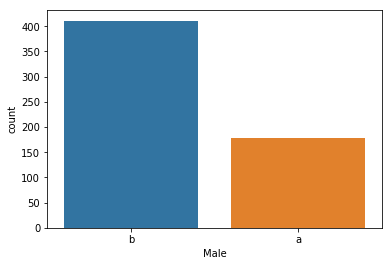

In [17]:
# Distribution of categorical variables after imputation
print (sns.countplot(x="Male", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


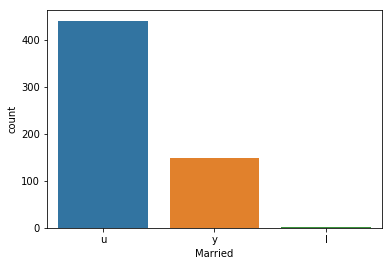

In [18]:
print (sns.countplot(x="Married", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


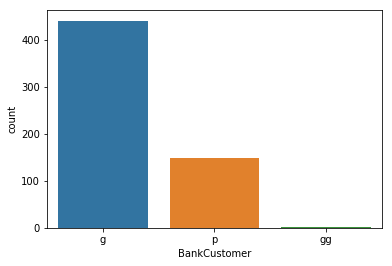

In [19]:
print (sns.countplot(x="BankCustomer", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


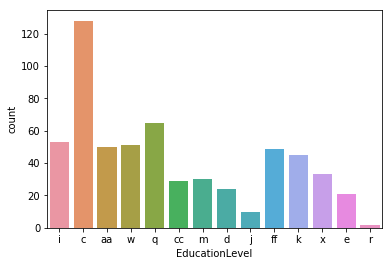

In [20]:
print (sns.countplot(x="EducationLevel", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


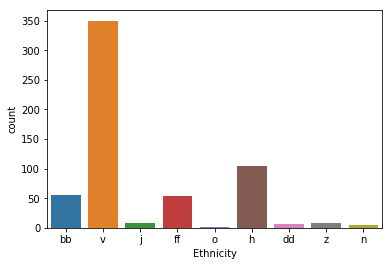

In [21]:
print (sns.countplot(x="Ethnicity", data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


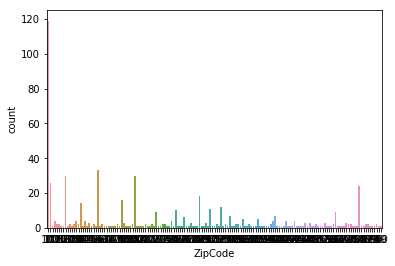

In [22]:
print (sns.countplot(x="ZipCode", data=train))

In [23]:
# Doing everything for test data

test.Age = np.float32(test.Age)

# Handling missing values & categorical data encoding.

# Replacing by mode
test.replace({'Male':{'?' :'b'}}, inplace=True) 
test.replace({'Married':{'?' :'u'}}, inplace=True) 
test.replace({'BankCustomer':{'?' :'g'}}, inplace=True) 
test.replace({'EducationLevel':{'?' :'c'}}, inplace=True) 
test.replace({'Ethnicity':{'?' :'v'}}, inplace=True) 

# Encoding true, false as 1,0 respectively --> Binary categorical variables.
test.replace({'PriorDefault':{'t' :1,'f' :0}}, inplace=True) 
test.replace({'Employed':{'t' :1, 'f' :0}}, inplace=True) 
test.replace({'DriversLicense':{'t' :1, 'f' :0}}, inplace=True) 


In [24]:
# For ensemble classifier.
# Maximum vote technique.
# Base classifiers used - Logistic Regression, Random Forest, Extreme Gradient Boosting.

# ensemble = pd.DataFrame()

In [25]:
#################### Logistic Regression ####################

In [26]:
#################### Data Preparation for modelling using Logistic Regression ####################

In [27]:
# logTrain = train.copy(deep = True) # Deep copy so that changes in logTrain are not reflected in train
# logTest = test.copy(deep = True)

In [28]:
# Deleting columns which are not meaningful for model building.
# del logTrain['Key']
# del logTrain['ZipCode']

# del logTest['ZipCode']

In [29]:
# Dummy encoding nominal categorical variables.

# logTrain = pd.get_dummies(logTrain, columns=['Male'], prefix = ['m'])

# logTrain = logTrain[logTrain.Married != 'l'] 
# logTrain = pd.get_dummies(logTrain, columns=['Married'], prefix = ['md'])

# logTrain = pd.get_dummies(logTrain, columns=['BankCustomer'], prefix = ['bc'])

# logTrain = pd.get_dummies(logTrain, columns=['EducationLevel'], prefix = ['el'])

# logTrain = logTrain[logTrain.Citizen != 'p']
# logTrain = pd.get_dummies(logTrain, columns=['Citizen'], prefix = ['ct'])

# Creating feature bins
# These feature bins didn't significantly increase AUC. So they were commented out while trying chiSq test and Age was used as 
# continuous feature itself.
# logTrain['Age'] = round(logTrain['Age'])
# logTrain['agebins'] = pd.cut(logTrain['Age'], [0,20,40,60,80], labels = ["[0,20]","[20,40]","[40,60]","[60,80]"])
# logTrain = pd.get_dummies(logTrain, columns=['agebins'], prefix = ['ag'])
# del logTrain['Age']

# logTest = pd.get_dummies(logTest, columns=['Male'], prefix = ['m'])
# logTest = pd.get_dummies(logTest, columns=['Married'], prefix = ['md'])
# logTest = pd.get_dummies(logTest, columns=['BankCustomer'], prefix = ['bc'])
# logTest = pd.get_dummies(logTest, columns=['EducationLevel'], prefix = ['el'])
# logTest = pd.get_dummies(logTest, columns=['Citizen'], prefix = ['ct'])

# Creating feature bins
# These feature bins didn't significantly increase AUC. So they were commented out while trying chiSq test and Age was used as 
# continuous feature itself.
# logTest['Age'] = round(logTest['Age'])
# logTest['agebins'] = pd.cut(logTest['Age'], [0,20,40,60,80], labels = ["[0,20]","[20,40]","[40,60]","[60,80]"])
# logTest = pd.get_dummies(logTest, columns=['agebins'], prefix = ['ag'])
# del logTest['Age']

# logTest['el_j'] = 0


In [30]:
# Logistic Regression model fitting.
# Building a basic logistic regression model without any feature selection.

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# Y = logTrain['Approved']
# X = logTrain

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# et_mean_encode = X_train.groupby('Ethnicity')['Approved'].mean()
# X_train.loc[:,'Ethnicity'] = X_train['Ethnicity'].map(et_mean_encode)
# X_test.loc[:,'Ethnicity'] = X_test['Ethnicity'].map(et_mean_encode)

# X_train_approved = X_train['Approved']
# X_test_approved = X_test['Approved']
# del X_train['Approved']
# del X_test['Approved']

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred_test = logreg.predict(X_test)
# y_pred_train = logreg.predict(X_train)

# print ('Train')
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print (roc_auc)
# print (false_positive_rate)
# print (true_positive_rate)

# print ('Test')
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred_test)
# print(confusion_matrix)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_test))
# print (X_train.columns)
# print ('Model Coefficients')
# print (logreg.coef_)

# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print (roc_auc)
# print (false_positive_rate)
# print (true_positive_rate)

# X_train['Approved'] = X_train_approved
# X_test['Approved'] = X_test_approved

In [31]:
#import pandas as pd
#import numpy as np
#import scipy.stats as stats
# from scipy.stats import chi2_contingency

#class ChiSquare:
#    def __init__(self, dataframe):
#        self.df = dataframe
#        self.p = None #P-Value
#        self.chi2 = None #Chi Test Statistic
#       self.dof = None
        
#        self.dfTabular = None
#        self.dfExpected = None
        
#    def _print_chisquare_result(self, colX, alpha):
#        result = ""
#        if self.p<alpha:
#            result="{0} is IMPORTANT for Prediction".format(colX)
#        else:
#            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

#        print(result)
        
#    def TestIndependence(self,colX,colY, alpha=0.01):
#        X = self.df[colX].astype(str)
#        Y = self.df[colY].astype(str)
        
#        self.dfObserved = pd.crosstab(Y,X) 
#        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
#        self.p = p
#        self.chi2 = chi2
#        self.dof = dof 
        
#        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
#        self._print_chisquare_result(colX, alpha)

In [32]:
# Using the same train,test split that was used for basic model building to compare between models.
# Building model after selecting features using chi square test

# X_train_Age = X_train['Age']
# del X_train['Age']
# X_train_Debt = X_train['Debt']
# del X_train['Debt']
# X_train_YearsEmployed = X_train['YearsEmployed']
# del X_train['YearsEmployed']
# X_train_Income =  X_train['Income']
# del X_train['Income']

# Initialize ChiSquare Class
# cT = ChiSquare(X_train)
# testColumns = X_train.columns

# for var in testColumns:
#     cT.TestIndependence(colX=var,colY="Approved" )  

# X_train['Age'] = X_train_Age
# X_train['Debt'] = X_train_Debt
# X_train['YearsEmployed'] = X_train_YearsEmployed
# X_train['Income'] = X_train_Income

# del X_train['Approved']
# del X_test['Approved']

Ethnicity is IMPORTANT for Prediction
PriorDefault is IMPORTANT for Prediction
Employed is IMPORTANT for Prediction
CreditScore is IMPORTANT for Prediction
DriversLicense is NOT an important predictor. (Discard DriversLicense from model)
m_a is NOT an important predictor. (Discard m_a from model)
m_b is NOT an important predictor. (Discard m_b from model)
md_u is IMPORTANT for Prediction
md_y is IMPORTANT for Prediction
bc_g is IMPORTANT for Prediction
bc_p is IMPORTANT for Prediction
el_aa is NOT an important predictor. (Discard el_aa from model)
el_c is NOT an important predictor. (Discard el_c from model)
el_cc is NOT an important predictor. (Discard el_cc from model)
el_d is NOT an important predictor. (Discard el_d from model)
el_e is NOT an important predictor. (Discard el_e from model)
el_ff is IMPORTANT for Prediction
el_i is IMPORTANT for Prediction
el_j is NOT an important predictor. (Discard el_j from model)
el_k is NOT an important predictor. (Discard el_k from model)
el_m 

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [32]:
# choosing best features.

# del X_train['DriversLicense']
# del X_train['m_a']
# del X_train['m_b']
# del X_train['el_aa']
# del X_train['el_c']
# del X_train['el_cc']
# del X_train['el_d']
# del X_train['el_e']
# del X_train['el_j']
# del X_train['el_k']
# del X_train['el_m']
# del X_train['el_r']
# del X_train['el_w']
# del X_train['ct_g']
# del X_train['ct_s']

# testCols = X_train.columns
# X_test = X_test[testCols]

# Logistic Regression model fitting.
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred_test = logreg.predict(X_test)
# y_pred_train = logreg.predict(X_train)

# print ('Train')
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print (roc_auc)
# print (false_positive_rate)
# print (true_positive_rate)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, y_pred_test)
# print(confusion_matrix)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_test))
# print (X_train.columns)
# print ('Model Coefficients')
# print (logreg.coef_)

# print ('Test')
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print (roc_auc)
# print (false_positive_rate)
# print (true_positive_rate)

# del X_train
# del X_test
# del y_train
# del y_test

In [33]:
#Actual model building for submission
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics

# Y = logTrain['Approved']
# X = logTrain

# et_mean_encode = logTrain.groupby('Ethnicity')['Approved'].mean()
# logTrain.loc[:,'Ethnicity'] = logTrain['Ethnicity'].map(et_mean_encode)
# logTest.loc[:,'Ethnicity'] = logTest['Ethnicity'].map(et_mean_encode)

# del logTrain['Approved']

# test_Key = logTest['Key']
# del logTest['Key']
# X_test = logTest

# logreg = LogisticRegression()
# logreg.fit(X, Y)

# Approved = logreg.predict(X_test)
# logTest['Approved'] = Approved
# logTest['Key'] = test_Key

# ensemble['Key'] = test_Key
# ensemble['lr'] = logTest['Approved']

# logTest.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 
# logTest.to_csv('submission7.csv')


In [34]:
# del logTrain
# del logTest

In [35]:
#################### XGBoost Model fitting ####################

In [36]:
#xgbTrain = train.copy(deep = True) # Deep copy so that changes in xgbTrain are not reflected in train
#xgbTest = test.copy(deep = True)

In [37]:
# Deleting columns which are not meaningful for model building.
#del xgbTrain['Key']
#del xgbTrain['ZipCode']

#del xgbTest['ZipCode']

In [38]:
#import xgboost as xgb

#Y = xgbTrain['Approved']
#X = xgbTrain

#xgbTrain = xgbTrain[xgbTrain.Married != 'l'] 
#xgbTrain = xgbTrain[xgbTrain.Citizen != 'p']

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#et_mean_encode = X_train.groupby('Ethnicity')['Approved'].mean()
#X_train.loc[:,'Ethnicity'] = X_train['Ethnicity'].map(et_mean_encode)
#X_test.loc[:,'Ethnicity'] = X_test['Ethnicity'].map(et_mean_encode)

#m_mean_encode = X_train.groupby('Male')['Approved'].mean()
#X_train.loc[:,'Male'] = X_train['Male'].map(m_mean_encode)
#X_test.loc[:,'Male'] = X_test['Male'].map(m_mean_encode)

#md_mean_encode = X_train.groupby('Married')['Approved'].mean()
#X_train.loc[:,'Married'] = X_train['Married'].map(md_mean_encode)
#X_test.loc[:,'Married'] = X_test['Married'].map(md_mean_encode)

#bc_mean_encode = X_train.groupby('BankCustomer')['Approved'].mean()
#X_train.loc[:,'BankCustomer'] = X_train['BankCustomer'].map(bc_mean_encode)
#X_test.loc[:,'BankCustomer'] = X_test['BankCustomer'].map(bc_mean_encode)

#el_mean_encode = X_train.groupby('EducationLevel')['Approved'].mean()
#X_train.loc[:,'EducationLevel'] = X_train['EducationLevel'].map(el_mean_encode)
#X_test.loc[:,'EducationLevel'] = X_test['EducationLevel'].map(el_mean_encode)

#ct_mean_encode = X_train.groupby('Citizen')['Approved'].mean()
#X_train.loc[:,'Citizen'] = X_train['Citizen'].map(ct_mean_encode)
#X_test.loc[:,'Citizen'] = X_test['Citizen'].map(ct_mean_encode)

#del X_train['Approved']
#del X_test['Approved']

#xg = xgb.XGBClassifier(objective = 'reg:logistic')
#xg.fit(X_train, y_train)

#y_pred_train = xg.predict(X_train)
#y_pred_test = xg.predict(X_test)

#print ("Train")
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print (roc_auc)
#print (false_positive_rate)
#print (true_positive_rate)

#print("Test")
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print (roc_auc)
#print (false_positive_rate)
#print (true_positive_rate)


#del X_train
#del X_test
#del y_train
#del y_test

In [39]:
# Actual model building for submission.
#import xgboost as xgb

#xgbTrain = xgbTrain[xgbTrain.Married != 'l'] 
#xgbTrain = xgbTrain[xgbTrain.Citizen != 'p']

#Y = xgbTrain['Approved']

#et_mean_encode = xgbTrain.groupby('Ethnicity')['Approved'].mean()
#xgbTrain.loc[:,'Ethnicity'] = xgbTrain['Ethnicity'].map(et_mean_encode)
#xgbTest.loc[:,'Ethnicity'] = xgbTest['Ethnicity'].map(et_mean_encode)

#m_mean_encode = xgbTrain.groupby('Male')['Approved'].mean()
#xgbTrain.loc[:,'Male'] = xgbTrain['Male'].map(m_mean_encode)
#xgbTest.loc[:,'Male'] = xgbTest['Male'].map(m_mean_encode)

#md_mean_encode = xgbTrain.groupby('Married')['Approved'].mean()
#xgbTrain.loc[:,'Married'] = xgbTrain['Married'].map(md_mean_encode)
#xgbTest.loc[:,'Married'] = xgbTest['Married'].map(md_mean_encode)

#bc_mean_encode = xgbTrain.groupby('BankCustomer')['Approved'].mean()
#xgbTrain.loc[:,'BankCustomer'] = xgbTrain['BankCustomer'].map(bc_mean_encode)
#xgbTest.loc[:,'BankCustomer'] = xgbTest['BankCustomer'].map(bc_mean_encode)

#el_mean_encode = xgbTrain.groupby('EducationLevel')['Approved'].mean()
#xgbTrain.loc[:,'EducationLevel'] = xgbTrain['EducationLevel'].map(el_mean_encode)
#xgbTest.loc[:,'EducationLevel'] = xgbTest['EducationLevel'].map(el_mean_encode)

#ct_mean_encode = xgbTrain.groupby('Citizen')['Approved'].mean()
#xgbTrain.loc[:,'Citizen'] = xgbTrain['Citizen'].map(ct_mean_encode)
#xgbTest.loc[:,'Citizen'] = xgbTest['Citizen'].map(ct_mean_encode)

#del xgbTrain['Approved']

#test_Key = xgbTest['Key']
#del xgbTest['Key']

#xg = xgb.XGBClassifier(objective = 'reg:logistic')
#xg.fit(xgbTrain, Y)

#Approved = xg.predict(xgbTest)
#xgbTest['Approved'] = Approved
#xgbTest['Key'] = test_Key
#ensemble['xgb'] = xgbTest['Approved']



In [40]:
#################### RandomForest Model fitting ####################

In [41]:
rfTrain = train.copy(deep = True) # Deep copy so that changes in rfTrain are not reflected in train
rfTest = test.copy(deep = True)

In [42]:
# Deleting columns which are not meaningful for model building.
del rfTrain['Key']
del rfTrain['ZipCode']

del rfTest['ZipCode']

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Y = rfTrain['Approved']
X = rfTrain

rfTrain = rfTrain[rfTrain.Married != 'l'] 
rfTrain = rfTrain[rfTrain.Citizen != 'p']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

et_mean_encode = X_train.groupby('Ethnicity')['Approved'].mean()
X_train.loc[:,'Ethnicity'] = X_train['Ethnicity'].map(et_mean_encode)
X_test.loc[:,'Ethnicity'] = X_test['Ethnicity'].map(et_mean_encode)

m_mean_encode = X_train.groupby('Male')['Approved'].mean()
X_train.loc[:,'Male'] = X_train['Male'].map(m_mean_encode)
X_test.loc[:,'Male'] = X_test['Male'].map(m_mean_encode)

md_mean_encode = X_train.groupby('Married')['Approved'].mean()
X_train.loc[:,'Married'] = X_train['Married'].map(md_mean_encode)
X_test.loc[:,'Married'] = X_test['Married'].map(md_mean_encode)

bc_mean_encode = X_train.groupby('BankCustomer')['Approved'].mean()
X_train.loc[:,'BankCustomer'] = X_train['BankCustomer'].map(bc_mean_encode)
X_test.loc[:,'BankCustomer'] = X_test['BankCustomer'].map(bc_mean_encode)

el_mean_encode = X_train.groupby('EducationLevel')['Approved'].mean()
X_train.loc[:,'EducationLevel'] = X_train['EducationLevel'].map(el_mean_encode)
X_test.loc[:,'EducationLevel'] = X_test['EducationLevel'].map(el_mean_encode)

ct_mean_encode = X_train.groupby('Citizen')['Approved'].mean()
X_train.loc[:,'Citizen'] = X_train['Citizen'].map(ct_mean_encode)
X_test.loc[:,'Citizen'] = X_test['Citizen'].map(ct_mean_encode)

del X_train['Approved']
del X_test['Approved']

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

print ('Test')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

C:\Users\Home\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Train
0.9871283255086073
[0.         0.00352113 1.        ]
[0.         0.97777778 1.        ]
[[65  6]
 [ 6 40]]
Test
0.8925290875688916
[0.         0.08450704 1.        ]
[0.         0.86956522 1.        ]


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
1
0.9357198748043818
Test
0.8253214941824862
********** Train **********
2
0.9068466353677621
Test
0.8087875076546233
********** Train **********
4
0.9426838810641628
Test
0.8413962033067973
********** Train **********
5
0.9773082942097028
Test
0.8534905082669932
********** Train **********
8
0.9843505477308295
Test
0.8675750153092467
********** Train **********
16
0.9944444444444445
Test
0.8784445805266381
********** Train **********
32
0.9972222222222222
Test
0.8925290875688916
********** Train **********
64
1.0
Test
0.8963563992651562


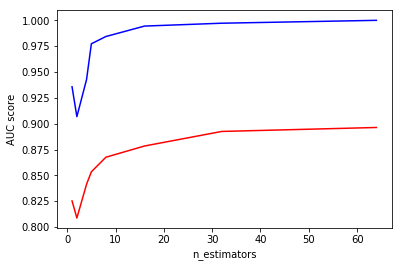

In [45]:
# Tuning Random forest parameters

n_estimators = [1, 2, 4, 5, 8, 16, 32, 64]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("********** Train **********")
    print (estimator)
    print (roc_auc)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Test")
    print (roc_auc)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
1.0
0.8253521126760563
Test
0.8887017758726271


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
2.0
0.8134976525821596
Test
0.856093080220453


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
3.0
0.8832942097026604
Test
0.911053276178812


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
4.0
0.8836854460093897
Test
0.8854868340477647


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
5.0
0.881455399061033
Test
0.8567054500918556


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
6.0
0.935172143974961
Test
0.86053276178812


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
7.0
0.9268388106416275
Test
0.8567054500918556


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
8.0
0.9724960876369328
Test
0.8746172688303736


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
9.0
0.9735133020344289
Test
0.8854868340477647


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
10.0
0.97981220657277
Test
0.8854868340477647


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
11.0
0.9833333333333334
Test
0.8816595223515002


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
12.0
0.9888888888888889
Test
0.8746172688303736


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
13.0
0.9760172143974962
Test
0.8675750153092467


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
14.0
0.9916666666666667
Test
0.8816595223515002


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
15.0
0.97981220657277
Test
0.8925290875688916


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
16.0
0.978794992175274
Test
0.8746172688303736


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
17.0
0.9899061032863851
Test
0.86053276178812


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
18.0
0.9843505477308295
Test
0.852878138395591


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
19.0
0.9843505477308295
Test
0.8816595223515002


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
20.0
0.9899061032863851
Test
0.903398652786283


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
21.0
0.9899061032863851
Test
0.9072259644825474


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
22.0
0.9888888888888889
Test
0.8893141457440294


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
23.0
0.9899061032863851
Test
0.8675750153092467


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
24.0
0.9916666666666667
Test
0.8420085731781995


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
25.0
0.9861111111111112
Test
0.9104409063074097


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
26.0
0.9833333333333334
Test
0.9104409063074097


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
27.0
0.9871283255086073
Test
0.8925290875688916


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
28.0
0.9916666666666667
Test
0.8778322106552359


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
29.0
0.9853677621283256
Test
0.921310471524801


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
30.0
0.9888888888888889
Test
0.8740048989589712


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
31.0
0.9853677621283256
Test
0.8567054500918556


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


********** Train **********
32.0
0.9871283255086073
Test
0.903398652786283


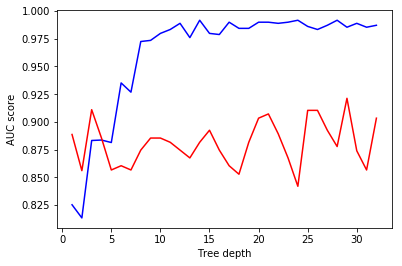

In [46]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("********** Train **********")
    print (max_depth)
    print (roc_auc)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Test")
    print (roc_auc)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

********** Train **********
0.1
0.8771909233176839
Test
0.8963563992651562
********** Train **********
0.2
0.8757042253521128
Test
0.8643600734843845
********** Train **********
0.30000000000000004
0.8395148669796557
Test
0.8170545009185548
********** Train **********
0.4
0.8104460093896713
Test
0.8599203919167178
********** Train **********
0.5
0.7952660406885759
Test
0.8663502755664422
********** Train **********
0.6
0.7162754303599375
Test
0.7767911818738519
********** Train **********
0.7000000000000001
0.5
Test
0.5
********** Train **********
0.8
0.5
Test
0.5
********** Train **********
0.9
0.5
Test
0.5
********** Train **********
1.0
0.5
Test
0.5


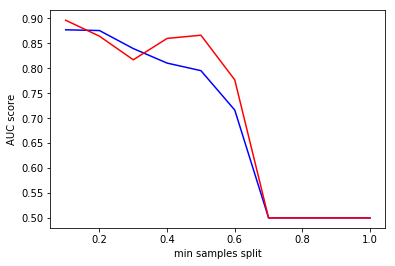

In [47]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("********** Train **********")
    print (min_samples_split)
    print (roc_auc)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Test")
    print (roc_auc)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

********** Train **********
0.1
0.8114632237871675
Test
0.8452235150030618
********** Train **********
0.2
0.8501564945226917
Test
0.8746172688303736
********** Train **********
0.30000000000000004
0.5
Test
0.5
********** Train **********
0.4
0.5
Test
0.5
********** Train **********
0.5
0.5
Test
0.5


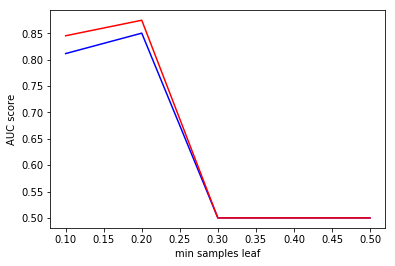

In [48]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("********** Train **********")
    print (min_samples_leaf)
    print (roc_auc)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Test")
    print (roc_auc)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

********** Train **********
1
0.9805555555555556
Test
0.870789957134109
********** Train **********
2
0.9780516431924884
Test
0.8778322106552359
********** Train **********
3
0.9888888888888889
Test
0.8675750153092467
********** Train **********
4
0.9881455399061033
Test
0.8746172688303736
********** Train **********
5
0.9881455399061033
Test
0.8816595223515002
********** Train **********
6
0.9944444444444445
Test
0.827924066135946
********** Train **********
7
0.9954616588419406
Test
0.9001837109614208
********** Train **********
8
0.9843505477308295
Test
0.8752296387017758
********** Train **********
9
0.9871283255086073
Test
0.8854868340477647
********** Train **********
10
0.9881455399061033


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test
0.9001837109614208
********** Train **********
11
0.9909233176838811
Test
0.9001837109614208
********** Train **********
12
0.9742566510172145
Test
0.8675750153092467
********** Train **********
13
0.9888888888888889
Test
0.8931414574402939


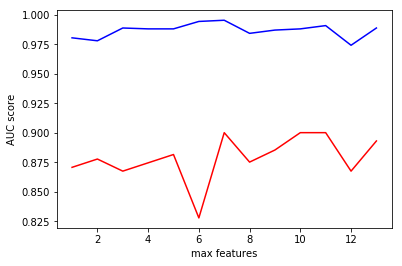

In [49]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("********** Train **********")
    print (max_feature)
    print (roc_auc)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ("Test")
    print (roc_auc)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [50]:
# After hyper parameter tuning

# n_estimators - 32
# max_depth - 13
# min_samples_split - 0.4
# min_samples_leaf - 0.3
# max_features - 10

rf = RandomForestClassifier(n_estimators = 32, max_depth = 13, min_samples_split = 0.4,  min_samples_leaf = 0.3, max_features = 10)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print ('Train')
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

print ('Test')
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print (false_positive_rate)
print (true_positive_rate)

Train
0.8585289514866978
[0.         0.22183099 1.        ]
[0.         0.93888889 1.        ]
Test
[[57 14]
 [ 1 45]]
0.890538885486834
[0.        0.1971831 1.       ]
[0.         0.97826087 1.        ]


In [56]:
# Actual model building for submission.
from sklearn.ensemble import RandomForestClassifier

rfTrain = train.copy(deep = True) # Deep copy so that changes in rfTrain are not reflected in train
rfTest = test.copy(deep = True)

# Deleting columns which are not meaningful for model building.
del rfTrain['Key']
del rfTrain['ZipCode']
del rfTest['ZipCode']

rfTrain = rfTrain[rfTrain.Married != 'l'] 
rfTrain = rfTrain[rfTrain.Citizen != 'p']

Y = rfTrain['Approved']

et_mean_encode = rfTrain.groupby('Ethnicity')['Approved'].mean()
rfTrain.loc[:,'Ethnicity'] = rfTrain['Ethnicity'].map(et_mean_encode)
rfTest.loc[:,'Ethnicity'] = rfTest['Ethnicity'].map(et_mean_encode)

m_mean_encode = rfTrain.groupby('Male')['Approved'].mean()
rfTrain.loc[:,'Male'] = rfTrain['Male'].map(m_mean_encode)
rfTest.loc[:,'Male'] = rfTest['Male'].map(m_mean_encode)

md_mean_encode = rfTrain.groupby('Married')['Approved'].mean()
rfTrain.loc[:,'Married'] = rfTrain['Married'].map(md_mean_encode)
rfTest.loc[:,'Married'] = rfTest['Married'].map(md_mean_encode)

bc_mean_encode = rfTrain.groupby('BankCustomer')['Approved'].mean()
rfTrain.loc[:,'BankCustomer'] = rfTrain['BankCustomer'].map(bc_mean_encode)
rfTest.loc[:,'BankCustomer'] = rfTest['BankCustomer'].map(bc_mean_encode)

el_mean_encode = rfTrain.groupby('EducationLevel')['Approved'].mean()
rfTrain.loc[:,'EducationLevel'] = rfTrain['EducationLevel'].map(el_mean_encode)
rfTest.loc[:,'EducationLevel'] = rfTest['EducationLevel'].map(el_mean_encode)

ct_mean_encode = rfTrain.groupby('Citizen')['Approved'].mean()
rfTrain.loc[:,'Citizen'] = rfTrain['Citizen'].map(ct_mean_encode)
rfTest.loc[:,'Citizen'] = rfTest['Citizen'].map(ct_mean_encode)

del rfTrain['Approved']

test_Key = rfTest['Key']
del rfTest['Key']

rf = RandomForestClassifier(n_estimators = 32, max_depth = 13, min_samples_split = 0.4,  min_samples_leaf = 0.3, max_features = 10)
rf.fit(rfTrain, Y)

Approved = rf.predict(rfTest)
rfTest['Approved'] = Approved
rfTest['Key'] = test_Key
#ensemble['rf'] = rfTest['Approved']

rfTest.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 
#rfTest.to_csv('submission10.csv')




In [57]:
# Ensemble of all three models.
# Maximum vote mechanism

In [58]:
#ensemble['approvedSum'] = ensemble.lr + ensemble.xgb + ensemble.rf
#ensemble['Approved'] = [0 if x <2 else 1 for x in ensemble['approvedSum']] 
#ensemble.replace({'Approved':{1 :'+', 0 :'-'}}, inplace=True) 
#ensemble.to_csv('submission9.csv')